In [1]:
import pycaret
pycaret.__version__

'3.0.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\parikshit joshi\Documents\GitHub\pycaret\notebooks\Assignment\MLOPS_ASSIGNMENT_GROUP2_TEAM6\data\raw\01_hdb_resale_transactions.csv')
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,174,ANG MO KIO AVENUE 4,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,1.375097,103.837619,10296.855750,1096.947897
1,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,1.373922,103.855621,10065.227930,847.235690
2,163,ANG MO KIO AVENUE 4,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,1.373552,103.838169,10118.831550,1176.742184
3,446,ANG MO KIO AVENUE 10,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,1.367761,103.855357,9383.300907,682.205473
4,557,ANG MO KIO AVENUE 10,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,1.371626,103.857736,9825.917255,953.047695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194235,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563
194236,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563
194237,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165
194238,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561


In [3]:
# Observe whether there is missing data or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194240 entries, 0 to 194239
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                194240 non-null  object 
 1   street_name          194240 non-null  object 
 2   town                 194240 non-null  object 
 3   postal_code          194240 non-null  int64  
 4   month                194240 non-null  object 
 5   flat_type            194240 non-null  object 
 6   storey_range         194240 non-null  object 
 7   floor_area_sqm       194240 non-null  float64
 8   flat_model           194240 non-null  object 
 9   lease_commence_date  194240 non-null  int64  
 10  resale_price         194240 non-null  float64
 11  latitude             194240 non-null  float64
 12  longitude            194240 non-null  float64
 13  cbd_dist             194240 non-null  float64
 14  min_dist_mrt         194240 non-null  float64
dtypes: float64(6), in

In [4]:
df['year'] = pd.to_datetime(df['month']).dt.year

In [5]:
df['remaining_lease'] = df['lease_commence_date'] + 99 - df['year']
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,year,remaining_lease
0,174,ANG MO KIO AVENUE 4,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,1.375097,103.837619,10296.855750,1096.947897,2015,70
1,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,1.373922,103.855621,10065.227930,847.235690,2015,65
2,163,ANG MO KIO AVENUE 4,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,1.373552,103.838169,10118.831550,1176.742184,2015,64
3,446,ANG MO KIO AVENUE 10,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,1.367761,103.855357,9383.300907,682.205473,2015,63
4,557,ANG MO KIO AVENUE 10,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,1.371626,103.857736,9825.917255,953.047695,2015,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194235,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563,2023,95
194236,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563,2023,95
194237,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165,2023,95
194238,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561,2023,95


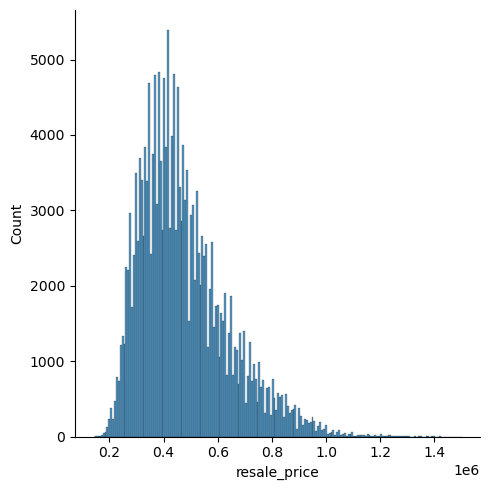

In [6]:
sns.displot(df['resale_price'])

## Binning town values to north,east,south, west

In [7]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [8]:
# Define the mapping of towns to regions
town_to_region = {
    'NORTH': ['SEMBAWANG', 'SENGKANG', 'WOODLANDS', 'YISHUN'],
    'EAST': ['BUKIT MERAH', 'BUKIT TIMAH', 'QUEENSTOWN'],
    'SOUTH': ['BEDOK', 'GEYLANG', 'HOUGANG', 'KALLANG/WHAMPOA', 'PASIR RIS', 'PUNGGOL', 'SERANGOON', 'TAMPINES'],
    'WEST': ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG EAST', 'JURONG WEST'],
    'CENTRAL': ['ANG MO KIO', 'CENTRAL AREA', 'BISHAN', 'MARINE PARADE', 'TOA PAYOH'],
}

# Create a function to map town to region
def map_town_to_region(town):
    for region, towns in town_to_region.items():
        if town in towns:
            return region
    return 'UNKNOWN'  # Default value if not found

# Apply the mapping function to create a new column
df['region'] = df['town'].apply(map_town_to_region)


In [9]:
df['region'].unique()

array(['CENTRAL', 'SOUTH', 'WEST', 'EAST', 'NORTH'], dtype=object)

<Axes: xlabel='resale_price', ylabel='Count'>

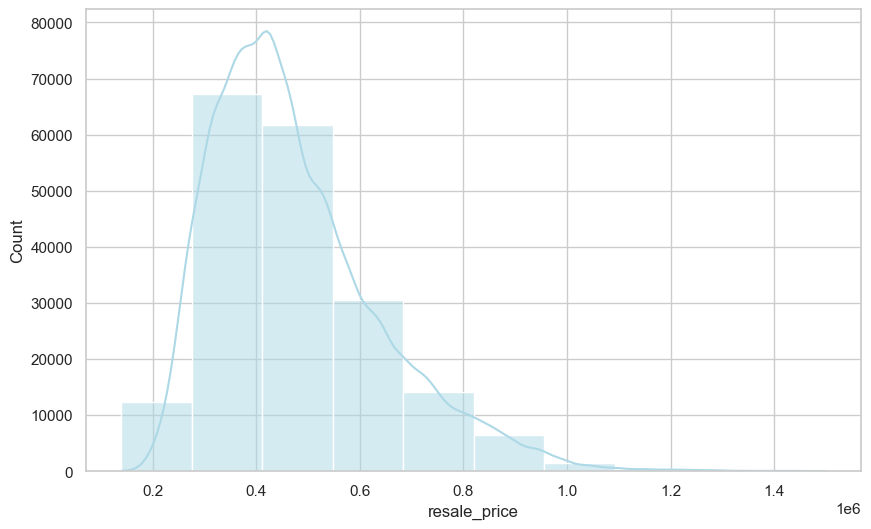

In [10]:
# Set up the seaborn style
sns.set(style="whitegrid")
# Create a histogram using sns.histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='resale_price', bins=10, kde=True, color='lightblue')


## a right-skewed distribution would look like below. We can observe deviation on the right side

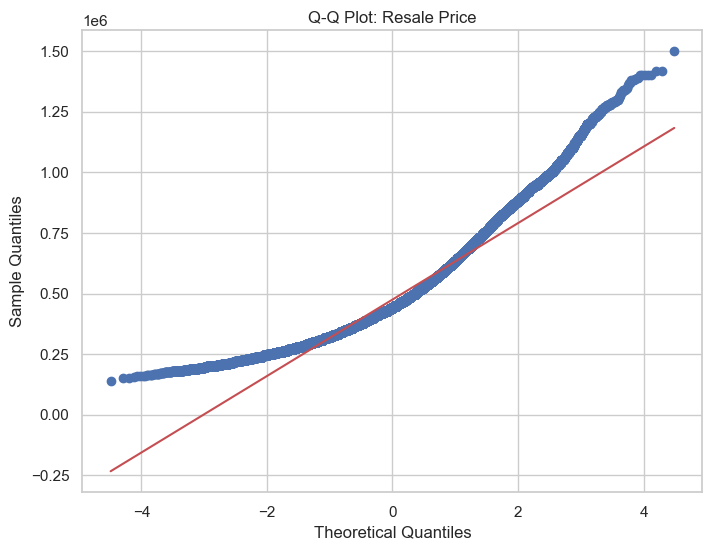

In [14]:
import scipy.stats as stats
# Set up the seaborn style
sns.set(style="whitegrid")

# Create a Q-Q plot using scipy.stats.probplot
plt.figure(figsize=(8, 6))
stats.probplot(df['resale_price'], plot=plt)

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot: Resale Price')

plt.show()



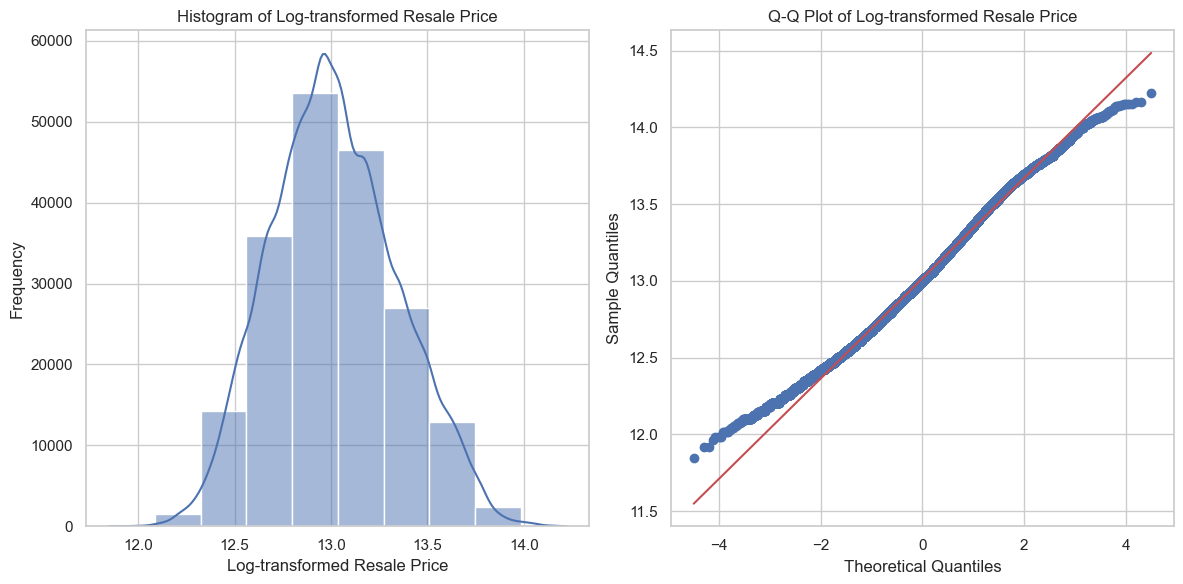

In [15]:
# Apply log transformation to the resale_price column
df['log_resale_price'] = np.log(df['resale_price'])

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a histogram of the log-transformed resale_price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='log_resale_price', bins=10, kde=True)
plt.xlabel('Log-transformed Resale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log-transformed Resale Price')

# Create a Q-Q plot of the log-transformed resale_price
plt.subplot(1, 2, 2)
stats.probplot(df['log_resale_price'], plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Log-transformed Resale Price')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'floor_area_sqm'}>,
        <Axes: title={'center': 'lease_commence_date'}>],
       [<Axes: title={'center': 'resale_price'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'cbd_dist'}>,
        <Axes: title={'center': 'min_dist_mrt'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'remaining_lease'}>,
        <Axes: title={'center': 'log_resale_price'}>, <Axes: >]],
      dtype=object)

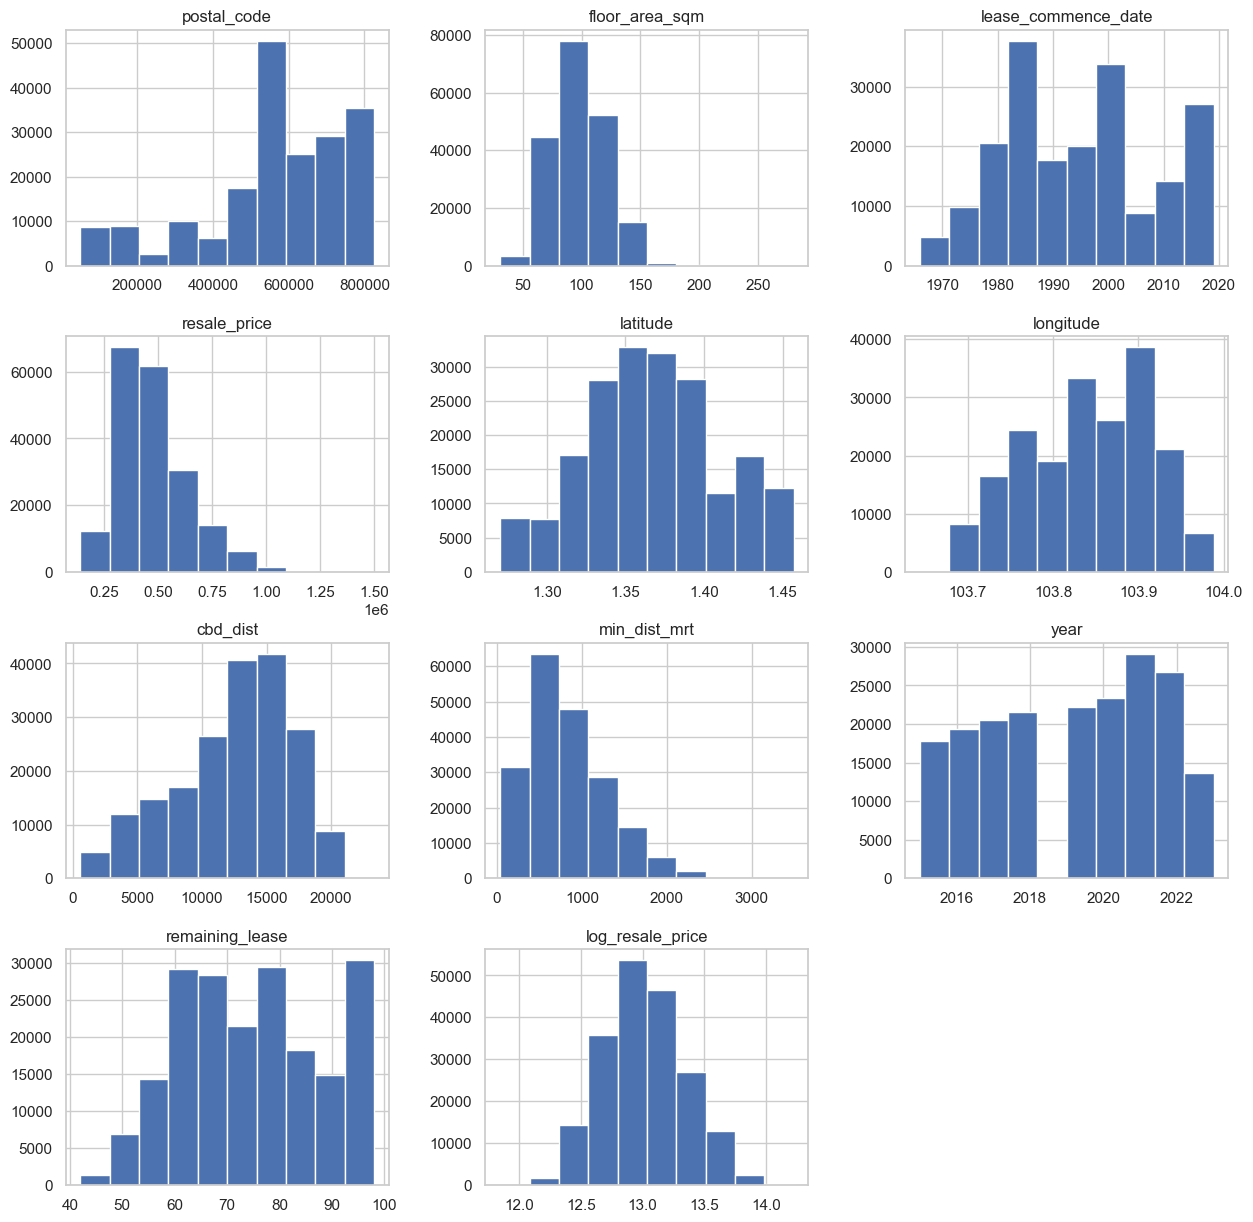

In [16]:
pd.DataFrame.hist(df,figsize=[15,15])

In [17]:
# In my analysis, I do not consider street name, block and  flat model is relevant (town is sufficient for analysis, 
#as no description of impact of the address, e.g., near MRT or not). Some information in flat model are either similar 
#to room type (2 room, multi generation, etc.) or it reflected how old the unit is, which can be represented by 
#lease commence date and remaining lease.Therefore. I will drop this column for my analysis

df = df.drop(['postal_code','year','month','street_name','lease_commence_date', 'block','town','resale_price'], axis=1)

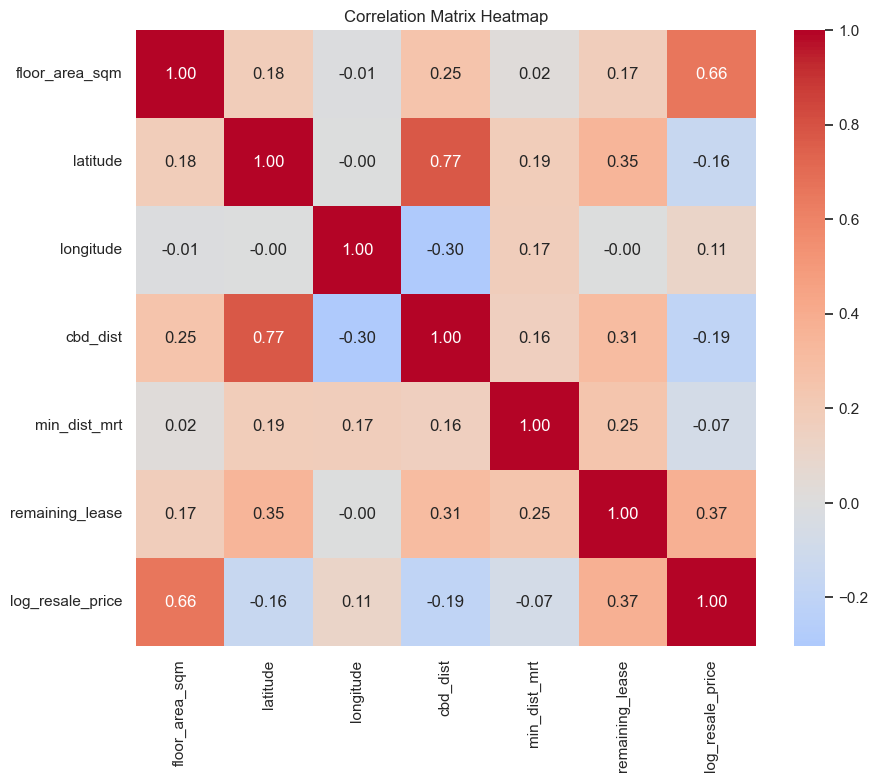

In [18]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the seaborn style
sns.set(style="white")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
from pycaret.regression import *
s = setup(df, target = 'log_resale_price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,log_resale_price
2,Target type,Regression
3,Original data shape,"(194240, 11)"
4,Transformed data shape,"(194240, 57)"
5,Transformed train set shape,"(135968, 57)"
6,Transformed test set shape,"(58272, 57)"
7,Numeric features,6
8,Categorical features,4
9,Preprocess,True


In [20]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [21]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [22]:
exp.setup(df, target = 'log_resale_price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,log_resale_price
2,Target type,Regression
3,Original data shape,"(194240, 11)"
4,Transformed data shape,"(194240, 57)"
5,Transformed train set shape,"(135968, 57)"
6,Transformed test set shape,"(58272, 57)"
7,Numeric features,6
8,Categorical features,4
9,Preprocess,True


In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0494,0.0044,0.0667,0.9586,0.0048,0.0038,61.9710
et,Extra Trees Regressor,0.0508,0.0047,0.0686,0.9562,0.0049,0.0039,68.0470
catboost,CatBoost Regressor,0.0645,0.0069,0.0831,0.9357,0.0059,0.0050,16.2080
xgboost,Extreme Gradient Boosting,0.0659,0.0072,0.0850,0.9327,0.0061,0.0051,16.4270
dt,Decision Tree Regressor,0.0639,0.0079,0.0888,0.9264,0.0064,0.0049,1.3220
lightgbm,Light Gradient Boosting Machine,0.0784,0.0098,0.0991,0.9085,0.0071,0.0060,1.9300
knn,K Neighbors Regressor,0.0809,0.0119,0.1090,0.8893,0.0078,0.0062,7.8950
gbr,Gradient Boosting Regressor,0.1024,0.0159,0.1263,0.8515,0.0090,0.0079,14.4180
ridge,Ridge Regression,0.1238,0.0227,0.1508,0.7881,0.0108,0.0095,0.5960
br,Bayesian Ridge,0.1238,0.0227,0.1508,0.7881,0.0108,0.0095,1.0880


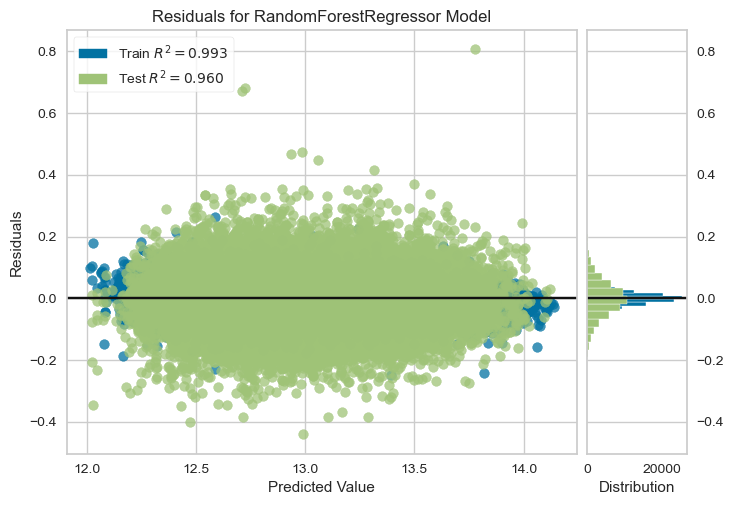

In [24]:
plot_model(best, plot = 'residuals')

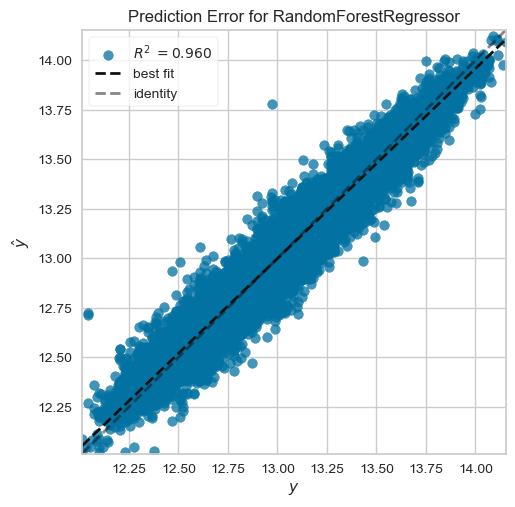

In [25]:
plot_model(best, plot = 'error')

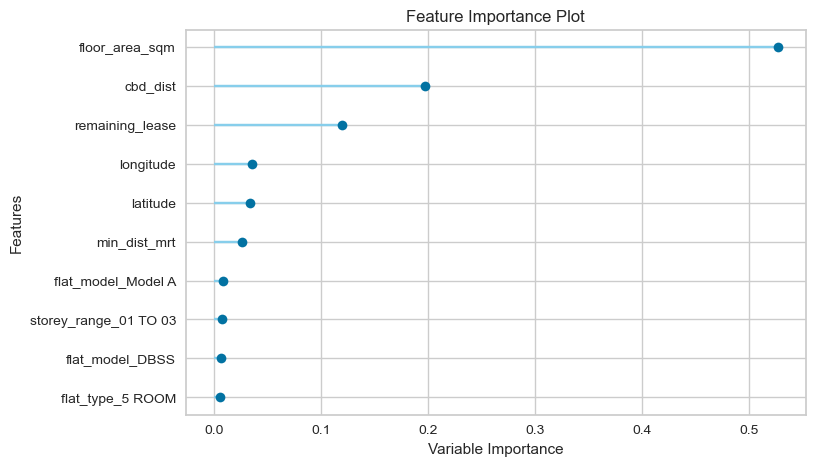

In [26]:
plot_model(best, plot = 'feature')

In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0490,0.0043,0.0659,0.9595,0.0047,0.0038


In [ ]:
plot_model(best, plot = 'learning', use_train_data = True)

In [31]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\PARIKS~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm', 'latitude',
                                              'longitude', 'cbd_dist',
                                              'min_dist_mrt',
                                              'remaining_lease'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['flat_type', 'storey_range',
                                              'flat_model', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['flat_type', 'storey_range',
                                              'flat_model', 'region'],
                                     transformer=OneHotEncoder(cols=['fla